Below we are going to load data from a csv, perform some checks, find the largest correlation, perform a linear regression and then plot the results.

#Data Ingestion:

Mount google drive then load Restaurant_Review_Dataset.csv into a data frame then check for missing values and inconsistencies

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/My Drive/data_files/Restaurant_Review_Dataset.csv',index_col=0) # Replace with your actual path

display(df)  #sneak peaky of df
print(df.isna().sum())    # NA check


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,food,ambience,service,rating
restaurant,,,,
1,85,82,89,78
2,80,90,80,85
3,83,86,83,85
4,70,96,75,72
5,68,80,78,75
6,65,70,56,54
7,64,68,61,62
8,72,95,72,73
9,69,70,78,70


food        0
ambience    0
service     0
rating      0
dtype: int64


#Correlation

Below we will identify any highest correlations within the data

In [ ]:
stats=df.corr()
stats.style.background_gradient(cmap='PRGn')

,food,ambience,service,rating
food,1.000000,0.182054,0.739492,0.839303
ambience,0.182054,1.000000,0.348678,0.372210
service,0.739492,0.348678,1.000000,0.796753
rating,0.839303,0.372210,0.796753,1.000000


###Interpretation of correlations
Above we can see that many of the variables show moderately strong positive relations and some do not.
Moderately strong positive variables are food service and rating, the highest being food.

Low positive correlation can be seen with ambience and service and rating and an even lower correlation between ambience and food

#Linear Regression

We have identified the highest correlation coefficient to be food and rating.
Below we will run a linear regression using the OLS model for those 2 variables

In [ ]:
import statsmodels.api as sm

# Extract the relevant columns
x = df['food']
y = df['rating']

# Add a constant term to the predictor variable
x = sm.add_constant(x)

# Fit the linear regression model
model = sm.OLS(y, x).fit()
intercept, slope = model.params

print("Intercept:", intercept)
print("Slope:", slope)
print(f"y={slope:.2f}*x+{intercept:.2f}")
print("R-squared:", model.rsquared)
print(f"p-value: {model.f_pvalue:.5f}")

Intercept: -4.822845114114791
Slope: 1.0650343452249063
y=1.07*x+-4.82
R-squared: 0.7044292803527601
p-value: 0.00009


#Visualization of results
We have identified the slope and intercept and we will not plot the variables alone with the regression line.

**Findings: There is a positive relationship with food and ratings, we can see below as the food score increase the rating increases as well.**

Text(0, 0.5, 'Rating')

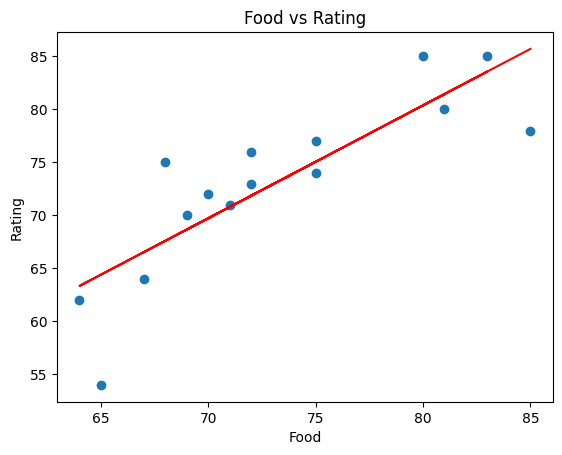

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['food'], df['rating']) # variable points
plt.plot(df['food'], slope * df['food'] + intercept, color='red') # regression line
plt.title('Food vs Rating')
plt.xlabel('Food')
plt.ylabel('Rating')

#Summary & Findings
Based on the statistical analysis we can see that there is a strong positive correlation between food and rating.

We can also see that based on the statistically values we a moderately strong r squared value of 0.7 that shows a resonable fit and a very low p value of <0.05 which indicates a strong statistical significance between the variables.


Lastly we can see in the scatterplot that the trendline follows the shape of the plot.

---------

**Based on results improving the food will have a positive impact on the rating.**